# Implementation of Neural Style Transfer on custom image !


Intro: the aim of this notebook is to showcase the application of neural style tranfer. In simple terms we are going to transfer the design and strokes from one image and superimpose the design on strokes on the main image. The final image produced will be a combination of base image and patterns and strokes from the second image 

In [1]:
# import necessary library and install all dependencies 
%tensorflow_version 1.x
%matplotlib inline
!pip install -q 'scipy<=1.2.1' 
!git clone https://github.com/titu1994/Neural-Style-Transfer.git
dir_path = "Neural-Style-Transfer"
import matplotlib.pyplot as plt
import os


TensorFlow 1.x selected.
     |████████████████████████████████| 24.8MB 123kB/s 
ERROR: lucid 0.3.10 requires umap-learn, which is not installed.
ERROR: lucid 0.3.10 has requirement numpy<=1.19, but you'll have numpy 1.19.5 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
Cloning into 'Neural-Style-Transfer'...
remote: Enumerating objects: 1411, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1411 (delta 5), reused 6 (delta 1), pack-reused 1393
Receiving objects: 100% (1411/1411), 68.18 MiB | 31.97 MiB/s, done.
Resolving deltas: 100% (824/824), done.


# Network Type

Choose the network type below : 

- "Network" for the original style transfer
- "INetwork" for the improved style transfer (default)

In [2]:
NETWORK = 'INetwork' + '.py'

In [3]:
# List all the arguments that can be supplied to Network.py
!python {dir_path}/{NETWORK} -h

Using TensorFlow backend.
usage: INetwork.py [-h] [--style_masks STYLE_MASKS [STYLE_MASKS ...]]
                   [--content_mask CONTENT_MASK] [--color_mask COLOR_MASK]
                   [--image_size IMG_SIZE] [--content_weight CONTENT_WEIGHT]
                   [--style_weight STYLE_WEIGHT [STYLE_WEIGHT ...]]
                   [--style_scale STYLE_SCALE]
                   [--total_variation_weight TV_WEIGHT] [--num_iter NUM_ITER]
                   [--model MODEL] [--content_loss_type CONTENT_LOSS_TYPE]
                   [--rescale_image RESCALE_IMAGE]
                   [--rescale_method RESCALE_METHOD]
                   [--maintain_aspect_ratio MAINTAIN_ASPECT_RATIO]
                   [--content_layer CONTENT_LAYER] [--init_image INIT_IMAGE]
                   [--pool_type POOL] [--preserve_color COLOR]
                   [--min_improvement MIN_IMPROVEMENT]
                   base ref [ref ...] res_prefix

Neural style transfer with Keras.

positional arguments:
  base     

# Network Parameters

Here, we will setup all of the parameters for the `Network.py` script.

You can tweak different values of hyperparamter and obtain differnt set of results. 



In [4]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 30
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0

# Content Image

Run the below cell to upload the Content Image. Make sure to select **just 1 image**

In [5]:
from google.colab import files

content_img = files.upload()

Saving Base.jpeg to Base.jpeg


Content image filename : Base.jpeg


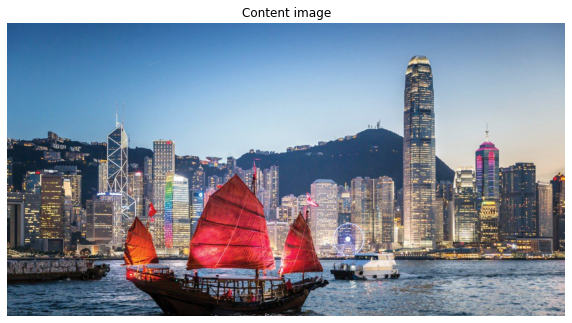

In [6]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

#Display the image 
fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

# Style Image

Run the below cell to upload the Style Image. Make sure to select **just 1 image**

In [7]:
#load style transfer image 
style_img = files.upload()

Saving Style.jpeg to Style.jpeg


Style image filename : Style.jpeg


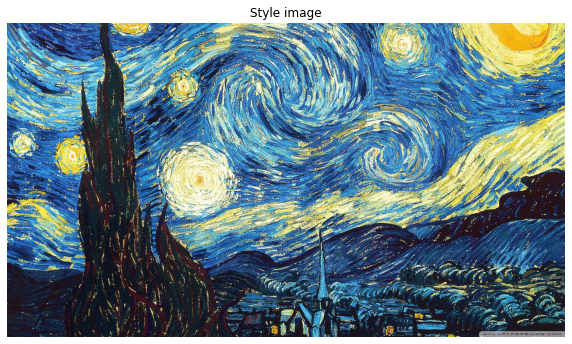

In [8]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp

print("Style image filename :", STYLE_IMAGE_FN)

fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

# Generate Image

Run the below cells to generate the image

In [9]:
RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

## Strart model Training 


In [10]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

80142336/80134624 [==============================] - 1s 0us/step
2021-07-04 20:40:25.541163: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-04 20:40:25.589904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-04 20:40:25.590486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-07-04 20:40:25.600780: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-07-04 20:40:25.808185: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic

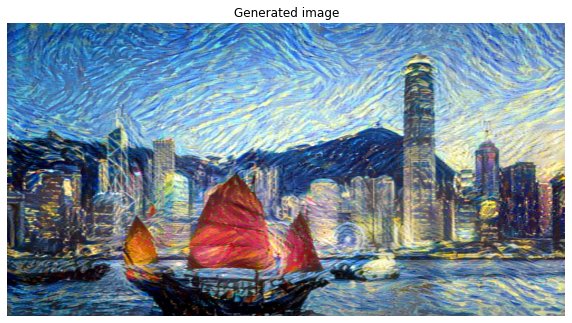

In [11]:
# plot final image !
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

# Download Color Transfered Image

Run the following cell to download the color transferred result

In [12]:
files.download(FINAL_IMAGE_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>